In [1]:
import pandas as pd
import numpy as np
import random
import time
import math
import os
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
path = "dataset/bank/log"
month = []
for filename in os.listdir(path):
    df = pd.read_csv(path+"/"+filename)
    if filename[-6].isdigit():
        num = int(filename[-6]+filename[-5])
    else:
        num = int(filename[-5])
    df['Day'] = num
    month.append(df)
report = pd.concat(month).reset_index(drop=True)

In [3]:
report["Call Length"]= report["Call End"] - report["Call Start"]
cols = list(report)
cols.insert(2,cols.pop(cols.index('Call Length')))
report = report.loc[:,cols]

In [4]:
report.to_csv('dataset/bank/report.csv')

In [5]:
def get_employee_report(employee_num):
    df = report[report["Employee"]==employee_num]
    average_call = df["Call Length"].mean()
    most_frequent_customers = list(df["Client"].mode())
    client_list = list(set([x for x in df["Client"]]))
    highest_rated_customer = 0
    highest_rating = 0
    for i in client_list:
        rating = df[df["Client"]==i]["Customer Feedback"].mean()
        if rating>highest_rating:
            highest_rated_customer = i
            highest_rating = rating
    five_star_per = len(df[df["Customer Feedback"]==5])/len(df)*100
    monthly_leads = df["Leads Generated"].sum()
    monthly_sales = df["Sales"].sum()
    print("Employee Number #"+str(employee_num)+":\nNumber of Calls: " +str(len(df))+ "\nAverage Call Length: " + str(average_call) + "\nMost Frequent Customer(s): " + str(most_frequent_customers)
          + "\nHighest Rated Customer: " + str(highest_rated_customer) + ", With A Rating Of " + str(highest_rating) + "\nFive Star Percentage: "
          + str(five_star_per)[0:5] + "%\nMonthly Leads: " + str(monthly_leads) + "\nMonthly Sales: " + str(monthly_sales))

In [6]:
def get_statistic(exp,df):
    if exp[0]=="mean":
        return df[exp[1]].mean()
    if exp[0]=="mode":
        return list(df[exp[1]].mode())
    if exp[0]=="sum":
        return df[exp[1]].sum()
    if exp[0]=="per":
        return len(df[df[exp[1]]==exp[2]])/len(df[exp[1]])*100
    if exp[0]=="max condition":
        max_candidate = 0
        max_value = 0
        candidate_list = list(set([x for x in df[exp[1]]]))
        for i in candidate_list:
            rating = df[df[exp[1]]==i][exp[2]].mean()
            if rating>max_value:
                max_candidate = i
                max_value = rating
        return max_candidate,max_value

In [8]:
def get_monthly_report(df):
    sales_total = df["Sales"].sum()
    leads_total = df["Leads Generated"].sum()
    sales_customers = df[df["Sales"]]
    mvp_customer_list = list(sales_customers["Client"].mode())
    profile_list = list(set(x for x in report["Demographic Profile"]))
    profile_candidate = 0
    profile_value = 0
    for i in profile_list:
        test_value = df[df["Demographic Profile"]==i]["Leads Generated"].sum()
        if test_value > profile_value:
            profile_candidate = i
            profile_value = test_value
    employee_list = list(set(x for x in df["Employee"]))
    employee_candidate = 0
    employee_value = 0
    employee_candidate2 = 0
    employee_value2 = 0
    for i in employee_list:
        testdf = df[df["Employee"]==i]
        test_value = testdf["Leads Generated"].sum()
        test_value2 = testdf[testdf["Demographic Profile"]==profile_candidate]["Leads Generated"].sum()
        if test_value>employee_value:
            employee_candidate = i
            employee_value = test_value
        if test_value2>employee_value2:
            employee_candidate2 = i
            employee_value2 = test_value2
    print("Monthly Report:\nSales Total: "+str(sales_total)+"\nLeads Total: "+str(leads_total)+"\nMVP Customers: "
         +str(mvp_customer_list)+ "\nHighest Leads Employee: "+ str(employee_candidate)+ 
          "\nDemographic Profile With Most Leads: "+str(profile_candidate)+ "\nEmployee Who Did Best With Profile: "
          +str(employee_candidate2))

In [10]:
get_monthly_report(report)
employee_list = list(set(x for x in df["Employee"]))
print("\nEmployee Reports:")
for i in range(len(employee_list)):
    print("\n")
    get_employee_report(i)

Monthly Report:
Sales Total: 10
Leads Total: 296
MVP Customers: [100]
Highest Leads Employee: 3
Demographic Profile With Most Leads: 10
Employee Who Did Best With Profile: 4

Employee Reports:


Employee Number #0:
Number of Calls: 49
Average Call Length: 23.829611812272564
Most Frequent Customer(s): [26, 37, 97]
Highest Rated Customer: 5, With A Rating Of 5.0
Five Star Percentage: 38.77%
Monthly Leads: 49
Monthly Sales: 2


Employee Number #1:
Number of Calls: 41
Average Call Length: 23.14688930806615
Most Frequent Customer(s): [20, 94]
Highest Rated Customer: 3, With A Rating Of 5.0
Five Star Percentage: 48.78%
Monthly Leads: 39
Monthly Sales: 2


Employee Number #2:
Number of Calls: 47
Average Call Length: 22.824511348628796
Most Frequent Customer(s): [36, 93]
Highest Rated Customer: 6, With A Rating Of 5.0
Five Star Percentage: 42.55%
Monthly Leads: 42
Monthly Sales: 0


Employee Number #3:
Number of Calls: 56
Average Call Length: 24.62571155860808
Most Frequent Customer(s): [100]


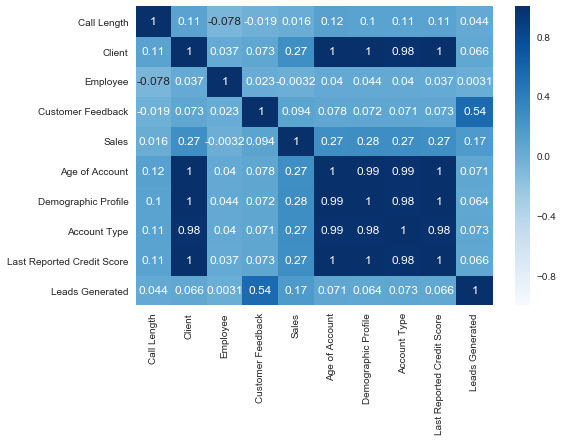

In [11]:
drop_report = report.drop(["Call Start","Call End","Day"],axis=1)
corr=drop_report.corr()
sb.heatmap(corr,annot=True,cmap="Blues")
plt.show()